Minimalna liczba eigenfaces dla 20% informacji: 10


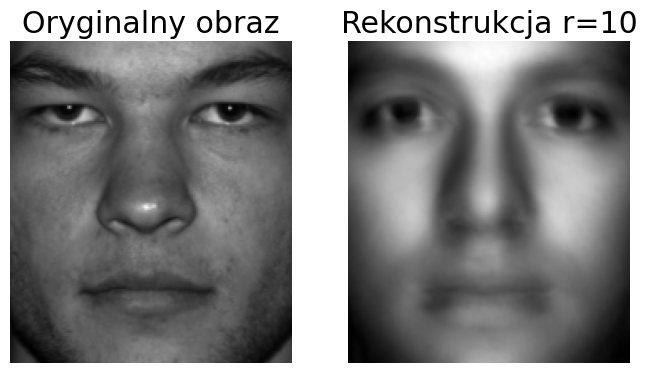

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import scipy.io

plt.rcParams['figure.figsize'] = [8, 8]
plt.rcParams.update({'font.size': 18})

# Wczytanie danych
mat_contents = scipy.io.loadmat('allFaces.mat')
faces = mat_contents['faces']
m = int(mat_contents['m'].item())  # zamiast int(mat_contents['m'])
n = int(mat_contents['n'].item())  # zamiast int(mat_contents['n'])
nfaces = np.ndarray.flatten(mat_contents['nfaces'])

# Dane treningowe (pierwsze 36 osób)
trainingFaces = faces[:,:np.sum(nfaces[:36])]
avgFace = np.mean(trainingFaces, axis=1)  # średnia twarz

# Odjęcie średniej twarzy i obliczenie SVD
X = trainingFaces - np.tile(avgFace, (trainingFaces.shape[1], 1)).T
U, S, VT = np.linalg.svd(X, full_matrices=0)

# Wyznaczenie liczby własnych twarzy potrzebnych do zachowania > k% informacji
k = 20  # procent informacji
cumulative_energy = np.cumsum(S) / np.sum(S)
r_min = np.searchsorted(cumulative_energy, k/100) + 1  # minimalna liczba eigenfaces
print(f"Minimalna liczba eigenfaces dla {k}% informacji: {r_min}")

# Testowa twarz (pierwsza twarz osoby 37)
testFace = faces[:, np.sum(nfaces[:36])]
testFaceMS = testFace - avgFace

# Rekonstrukcja obrazu przy użyciu minimalnej liczby eigenfaces
reconFace = avgFace + U[:, :r_min] @ U[:, :r_min].T @ testFaceMS

# Wyświetlenie wyników
plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(np.reshape(testFace, (m, n)).T, cmap='gray')
plt.title('Oryginalny obraz')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(np.reshape(reconFace, (m, n)).T, cmap='gray')
plt.title(f'Rekonstrukcja r={r_min}')
plt.axis('off')

plt.show()
